# 1 - Process McKinley Mine seeding unit vectors
This notebook opens and processes vectors for the different seeding units at McKinley Mine.

## Setup

In [1]:
# Import libraries
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Set working directory
os.chdir(os.path.join('E:/',
                      'McKinley'))

## Import and process seeding unit polygons

In [27]:
# Import seeding units shapefile
mckinley_seeding_path = os.path.join(
    'vectors', 'Golder_GIS_Data_Export_2021_04_27_Seeding', 'Seeding_Master_shifted.shp')
mckinley_seeding = gpd.read_file(mckinley_seeding_path)

In [28]:
# Clean up columns
mckinley_seeding_subset = mckinley_seeding.loc[:, [
    'Mine_Area', 'Start_Year', 'End_Year', 'GIS_Acre2', 'Agreement', 'Seed_Type', 'TYPE', 'geometry']]

# Remove rows older than 2013
drop = mckinley_seeding_subset[mckinley_seeding_subset['Start_Year'] < 2010].index
mckinley_seeding_subset.drop(drop, inplace=True)

In [29]:
# Filter polygons to remove roads, tracks, ROW's
# Calculate perimeter-area ratio
mckinley_seeding_subset['PAR'] = mckinley_seeding_subset.geometry.length / \
    mckinley_seeding_subset.geometry.area

# Filter by perimeter-area ratio
threshold = 0.01
mckinley_seeding_subset_PARlo = mckinley_seeding_subset[mckinley_seeding_subset['PAR'] < threshold]

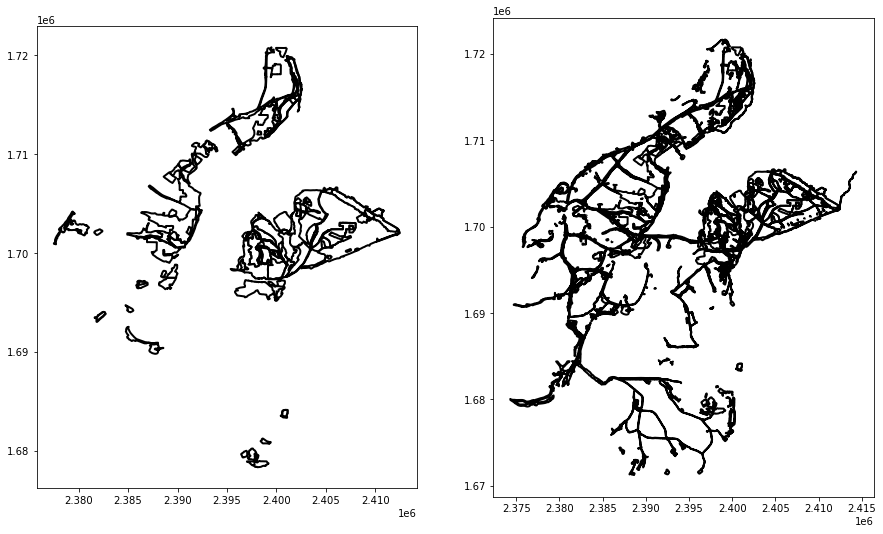

In [30]:
# Plot the filtered seeding units
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
mckinley_seeding_subset_PARlo.plot(ax=ax1,
                                   color='None',
                                   edgecolor='black',
                                   linewidth=2)

mckinley_seeding_subset.plot(ax=ax2,
                                   color='None',
                                   edgecolor='black',
                                   linewidth=2)

In [24]:
# Display the DF
mckinley_seeding_subset_PARlo

,Mine_Area,Start_Year,End_Year,GIS_Acre2,Agreement,Seed_Type,TYPE,geometry,PAR
172,9N,2017,2017,8.774365,Permanent Program,Seed,Seeding,"POLYGON ((2401075.334 1683413.202, 2401068.257...",0.007403
264,10,2001,2001,106.000253,Permanent Program,Seed,Seeding,"POLYGON ((2386182.494 1695205.653, 2387506.597...",0.002274
293,None,2002,2002,66.292625,Permanent Program,Seed,Seeding,"POLYGON ((2397716.696 1712439.300, 2397753.387...",0.003688
296,None,2006,2006,25.762909,Permanent Program,Seed,Seeding,"POLYGON ((2401181.944 1715643.782, 2401052.253...",0.007419
297,None,2006,2006,3.968883,Permanent Program,Seed,Seeding,"POLYGON ((2399964.585 1712984.319, 2399945.117...",0.009339
...,...,...,...,...,...,...,...,...,...
2634,None,2019,2019,4.069068,Permanent Program,Interseed,Interseeding_Wildlife,"POLYGON ((2399231.024 1711967.785, 2399227.792...",0.009876
2645,None,2019,2019,6.954194,Permanent Program,Interseed,Interseeding_Wildlife,"POLYGON ((2400582.550 1701147.411, 2400589.578...",0.008810
2646,None,2019,2019,4.830405,Permanent Program,Reseed,Reseeding,"POLYGON ((2398238.925 1700967.351, 2398244.226...",0.009492
2648,None,2019,2019,7.350496,Permanent Program,Interseed,Interseeding,"POLYGON ((2397437.054 1703154.667, 2397439.018...",0.008919


## Plots

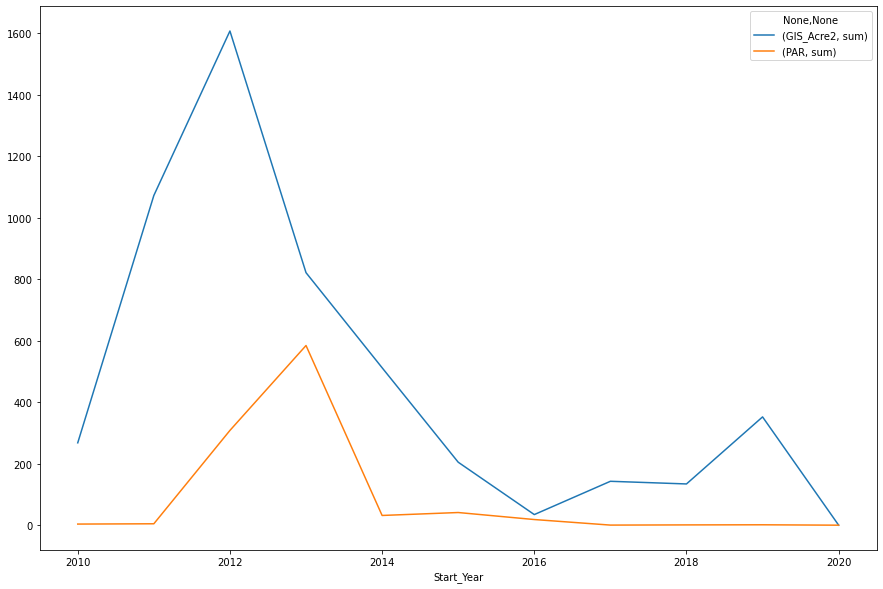

In [32]:
# Setup plots
fig, ax = plt.subplots(figsize=(15, 10))

# Plot acreage seeded/re-seeded per year
mckinley_seeding_subset.groupby('Start_Year').agg({'GIS_Acre2': ['sum']}).plot(
         ax=ax, use_index=True)

# Plot cumulative sum???

## Save the DF for use in subsequent notebooks

In [8]:
%store mckinley_seeding_subset_PARlo

Stored 'mckinley_seeding_subset_PARlo' (GeoDataFrame)
